In [1]:
import spacy


In [2]:
!which python

/Users/enriqueviv/Library/Caches/pypoetry/virtualenvs/aesop-spacy-V0v2nuUF-py3.12/bin/python


<h3> Loading the models and text

# trained pipelines:

# ----------------------------------- 

# download the dutch  model (with word vectors): !python -m spacy download nl_core_news_lg
# multi-language: !python -m spacy download xx_sent_ud_sm
# german (accuracy): !python -m spacy download de_dep_news_trf



In [54]:
nl_nlp = spacy.load("nl_core_news_lg") #dutch model
de_nlp = spacy.load("de_dep_news_trf") #german model
mul_nlp = spacy.load("xx_sent_ud_sm")  #multilanguage model 

/Users/enriqueviv/Library/Caches/pypoetry/virtualenvs/aesop-spacy-V0v2nuUF-py3.12/lib/python3.12/site-packages/thinc/shims/pytorch.py:253: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental

In [66]:
from spacy.lang.xx import MultiLanguage
# Create a Multilanguage nlp object
#nlp = MultiLanguage()
nlp = spacy.load("nl_core_news_lg")

# Function to select the right model based on the language of the input text
def process_text(text):
    if nl_nlp(text): #checking if it's dutch
        return nl_nlp(text)
    elif de_nlp(text):
        return de_nlp(text) #check if it's german 
    else: #fallback to multilingual model
        return mul_nlp(text)


In [67]:
with open("aesop_extract_nlp_nl_de.txt", encoding="utf8" ,errors='ignore') as f:
    text = f.read()
   
    


    

In [68]:
#check if the text is working by printing first characters 
print(text[0:21])

De Wolf en het Geitje


In [97]:
# Creating the Doc object
doc = nlp(text)

# Displaying the writing system
print(f"\n{'='*10} Writing System {'='*10}")
print(f"Writing System: {doc.vocab.writing_system}\n")

# Print header for token information
print(f"{'='*10} Token Information {'='*10}\n")

# Iterate through the first three tokens and check some attributes
for token in doc[0:3]:
    print(f"Token: {token.text}")
    print(f"  Lemma: {token.lemma_}")
    print(f"  Lex Language: {token.lex.lang_}")
    print(f"  Sentence Span: {token.sent}")
    print(f"  Head: {token.head}")
    print(f"  Index: {token.i}")
    print(f"  POS: {token.pos_}")
    print(f"  Detailed Tag: {token.tag_}")
    print(f"  Dependency: {token.dep_}")
    print(f"  Shape: {token.shape_}")
    print(f"  Is Alpha: {token.is_alpha}")
    print(f"  Is Stop Word: {token.is_stop}")
    print("-" * 30)  # Separator for each token




========== Writing System ==========
Writing System: {'direction': 'ltr', 'has_case': True, 'has_letters': True}

========== Token Information ==========

Token: De
  Lemma: De
  Lex Language: nl
  Sentence Span: De Wolf en het Geitje 


  Head: De
  Index: 0
  POS: PROPN
  Detailed Tag: SPEC|deeleigen
  Dependency: ROOT
  Shape: Xx
  Is Alpha: True
  Is Stop Word: True
------------------------------
Token: Wolf
  Lemma: Wolf
  Lex Language: nl
  Sentence Span: De Wolf en het Geitje 


  Head: De
  Index: 1
  POS: PROPN
  Detailed Tag: SPEC|deeleigen
  Dependency: flat
  Shape: Xxxx
  Is Alpha: True
  Is Stop Word: False
------------------------------
Token: en
  Lemma: en
  Lex Language: nl
  Sentence Span: De Wolf en het Geitje 


  Head: Geitje
  Index: 2
  POS: CCONJ
  Detailed Tag: VG|neven
  Dependency: cc
  Shape: xx
  Is Alpha: True
  Is Stop Word: True
------------------------------


In [99]:
# A Span object (a slice from the Doc)
span = doc[0:72]
print(span.text)

De Wolf en het Geitje 

Er was eens een klein geitje dat hoorntjes begon te krijgen en daarom dacht dat hij nu al een grote geit was. Hij liep in de wei, samen met zijn moeder en een grote kudde geiten, en zei tegen iedereen dat hij nu wel voor zichzelf kon zorgen. Elke avond gingen de geiten naar hun stal om er te slapen. Op


Lexical Attributes

In [101]:
# Prepare the data for printing
indices = [token.i for token in doc][6:15]
texts = [token.text for token in doc][6:15]
lemmas = [token.lemma_ for token in doc][6:15]
pos_tags = [token.pos_ for token in doc][6:15]
dependencies = [token.dep_ for token in doc][6:15]
ent_types = [token.ent_type_ if token.ent_type_ else "None" for token in doc][:15]  # Handle empty entity types
is_alpha = [token.is_alpha for token in doc][6:15]
is_punct = [token.is_punct for token in doc][6:15]
like_num = [token.like_num for token in doc][6:15]
shapes = [token.shape_ for token in doc][6:15]
is_stop = [token.is_stop for token in doc][6:15]

# Print header
print("Lexical Attributes of Tokens:\n" + "=" * 80)
print(f"{'Index':<5} {'Text':<15} {'Lemma':<15} {'POS':<6} {'Dep':<10} {'Ent Type':<10} {'Shape':<8} {'Is Alpha':<8} {'Is Punct':<8} {'Like Num':<10} {'Is Stop'}")
print("-" * 100)

# Print each token's information in a structured format
for index, text, lemma, pos, dep, ent_type, shape, alpha, punct, num, stop in zip(indices, texts, lemmas, pos_tags, dependencies, ent_types, shapes, is_alpha, is_punct, like_num, is_stop):
    print(f"{index:<5} {text:<15} {lemma:<15} {pos:<6} {dep:<10} {ent_type:<10} {shape:<8} {str(alpha):<8} {str(punct):<8} {str(num):<10} {str(stop)}")

print("=" * 80)


Lexical Attributes of Tokens:
Index Text            Lemma           POS    Dep        Ent Type   Shape    Is Alpha Is Punct Like Num   Is Stop
----------------------------------------------------------------------------------------------------
0     De              De              PROPN  ROOT       None       Xx       True     False    False      True
1     Wolf            Wolf            PROPN  flat       None       Xxxx     True     False    False      False
2     en              en              CCONJ  cc         None       xx       True     False    False      True
3     het             het             DET    det        None       xxx      True     False    False      True
4     Geitje          geitje          NOUN   conj       None       Xxxxx    True     False    False      False
5     

              

              SPACE  dep        None       

       False    False    False      False
6     Er              er              ADV    advmod     None       Xx       True     False   

In [33]:
# Predicting Part-of-speech Tags
for token in doc:
    print(token.text, token.pos_)

De 
Wolf 
en 
het 
Geitje 


 
Er 
was 
eens 
een 
klein 
geitje 
dat 
hoorntjes 
begon 
te 
krijgen 
en 
daarom 
dacht 
dat 
hij 
nu 
al 
een 
grote 
geit 
was 
. 
Hij 
liep 
in 
de 
wei 
, 
samen 
met 
zijn 
moeder 
en 
een 
grote 
kudde 
geiten 
, 
en 
zei 
tegen 
iedereen 
dat 
hij 
nu 
wel 
voor 
zichzelf 
kon 
zorgen 
. 
Elke 
avond 
gingen 
de 
geiten 
naar 
hun 
stal 
om 
er 
te 
slapen 
. 
Op 
een 
avond 
bleef 
het 
klein 
geitje 
op 
de 
wei 
staan 
. 
  
Zijn 
moeder 
riep 
hem 
om 
mee 
naar 
huis 
te 
gaan 
. 
Maar 
hij 
wilde 
niet 
luisteren 
en 
bleef 
knabbelen 
aan 
het 
malse 
gras 
. 
Toen 
hij 
na 
een 
tijdje 
rondkeek 
zag 
hij 
dat 
zijn 
moeder 
en 
de 
andere 
geiten 
al 
naar 
huis 
waren 
. 
  
Hij 
was 
helemaal 
alleen 
. 
De 
zon 
ging 
onder 
en 
er 
kropen 
lange 
schaduwen 
over 
de 
grond 
. 
Een 
koude 
wind 
stak 
op 
en 
maakte 
akelige 
geluiden 
in 
het 
gras 
en 
in 
de 
bomen 
. 
Het 
geitje 
rilde 
toen 
het 
dacht 
aan 
de 
verschrikkelijke 

In [34]:
#Predicting Syntactic Dependencies
# in addition to POS we can also predict how the words are related like if a word is the subject of the sentence or an object
# .dep_ attribute returns the predicted dependency label, .head returns syntactic head token (which parent token is it attached to)
for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}{token.head.text:<10}")

#for token in doc:
    #print(token.text, token.pos_, token.dep_, token.head.text)

De                              De        
Wolf                            Wolf      
en                              en        
het                             het       
Geitje                          Geitje    


                              

        
Er                              Er        
was                             was       
eens                            eens      
een                             een       
klein                           klein     
geitje                          geitje    
dat                             dat       
hoorntjes                       hoorntjes 
begon                           begon     
te                              te        
krijgen                         krijgen   
en                              en        
daarom                          daarom    
dacht                           dacht     
dat                             dat       
hij                             hij       
nu                              nu        
al         

In [35]:
#Predicting Named Entities
for ent in doc.ents:
    print(f"{ent.text}, {ent.label_}")

In [36]:
#get definitions of the tabs and labels
spacy.explain("MISC")


'Miscellaneous entities, e.g. events, nationalities, products or works of art'

In [37]:
spacy.explain("pnc")

'proper noun component'

In [38]:

spacy.explain("oa")

'accusative object'

In [39]:
spacy.explain("sb")

'subject'

In [40]:
for ent in doc.ents:
    print(f"{ent.text}, {ent.label_}, {spacy.explain(ent.label_)}")

<center><h4> Rule-based matching </h4></center>

In [41]:
print("hash value:", nlp.vocab.strings["terwijl"])
print("string value:", nlp.vocab.strings[6052211810934134087])

hash value: 6052211810934134087
string value: terwijl


In [42]:
lexeme = nlp.vocab["terwijl"]
print(f"{lexeme.text}, {lexeme.orth}, {lexeme.is_alpha}")

terwijl, 6052211810934134087, True


A lexeme object is an entry in the vocabulary, contains the context-independent information about a word. 
Lexemes don't have part-of-speech tags, dependencies or entity labels. Those depend on context

It is not having a great prediction is tagging most of the words as PRON (pronoun) and X(other) 

<h3> Universal POS tags </h3>

Alphabetical listing

* ADJ: adjective
* ADP: adposition
* ADV: adverb
* AUX: auxiliary
* CCONJ: coordinating conjunction
* DET: determiner
* INTJ: interjection
* NOUN: noun
* NUM: numeral
* PART: particle
* PRON: pronoun
* PROPN: proper noun
* PUNCT: punctuation
* SCONJ: subordinating conjunction
* SYM: symbol
* VERB: verb
* X: other


In [43]:
from spacy import displacy
options = {"compact":True, "bg": "#FFA500", "color": "white", "font": "Source Sans Pro" }
displacy.render(doc, style="dep", options=options)


/Users/enriqueviv/Library/Caches/pypoetry/virtualenvs/aesop-spacy-V0v2nuUF-py3.12/lib/python3.12/site-packages/spacy/displacy/__init__.py:141: UserWarning: [W005] Doc object not parsed. This means displaCy won't be able to generate a dependency visualization for it. Make sure the Doc was processed with a model that supports dependency parsing, and not just a language class like `English()`. For more info, see the docs:
https://spacy.io/usage/models
  warnings.warn(Warnings.W005)


<h4> Named Entities </h4>

In [44]:
#Create the Doc object
doc = nlp(text)

#extract entitities
for ent in doc.ents:
    print (ent.text, ent.start_char, ent.end_char, ent.label_)

In [45]:
displacy.render(doc, style="ent")

/Users/enriqueviv/Library/Caches/pypoetry/virtualenvs/aesop-spacy-V0v2nuUF-py3.12/lib/python3.12/site-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [46]:
#Word vectors and semantic similarity (2) 
fabel_1 = doc[0:392].text + ". Laat je noot afleiden als je iets wilt bereiken"
print(fabel_1)


begon. Laat je noot afleiden als je iets wilt bereiken


In [49]:
nlp = spacy.load("nl_core_news_lg")


In [50]:
morale_1 = nlp ("Zorg dat je door je fantasieën de realiteit niet vergeet.")
morale_2 = nlp("Aap geen dingen na indien je er geen verstand van heb")

In [51]:
print(morale_1.similarity(morale_2))

0.7394450121748931


Similarity is determined using word vectors
* Multi-dimensional meaning representations of words
* Generated using an algorithm like Word2Vec and lots of text
* Can be added to spaCy's pipelines
* Default: cosine similarity, but can be adjusted
* Doc and Span vectors default to average of token vectors
* Short phrases are better than long documents with many irrelevant words

In [46]:
#Word vectors
print(doc.vector)

[]


Similarity depends on the application context
Useful for many applications: recommendation systems, flagging duplicates etc.
There's no objective definition of "similarity"
Depends on the context and what application needs to do

<h4> Word vectors and semantic similarity </h4>

In [47]:
tokens = nlp(text)
for token in tokens:
    print((token.text, token.has_vector, token.vector_norm, token.is_oov))

('De', True, 79.562294, False)
('Wolf', True, 26.167927, False)
('en', True, 43.26204, False)
('het', True, 40.801765, False)
('Geitje', True, 18.493208, False)
('\n\n', False, 0.0, True)
('Er', True, 97.06308, False)
('was', True, 49.06247, False)
('eens', True, 29.504496, False)
('een', True, 37.42749, False)
('klein', True, 29.518625, False)
('geitje', True, 19.528522, False)
('dat', True, 44.51479, False)
('hoorntjes', True, 20.62385, False)
('begon', True, 33.67286, False)
('te', True, 85.16472, False)
('krijgen', True, 28.68731, False)
('en', True, 43.26204, False)
('daarom', True, 22.6012, False)
('dacht', True, 23.69769, False)
('dat', True, 44.51479, False)
('hij', True, 47.01052, False)
('nu', True, 49.016922, False)
('al', True, 60.142204, False)
('een', True, 37.42749, False)
('grote', True, 29.107916, False)
('geit', True, 25.063614, False)
('was', True, 49.06247, False)
('.', True, 43.79055, False)
('Hij', True, 49.8166, False)
('liep', True, 40.610226, False)
('in', True

In [48]:
satz_1= nlp("Een eenvoudig leven met rust en zekerheid is meer waard dan rijkdom temidden van angst en onzekerheid.")
satz_2 = nlp("Genügsamkeit und Zufriedenheit macht glücklicher als Reichtum und Überfluß unter großen Sorgen.")
print(satz_1, "<->", satz_2, satz_1.similarity(satz_2))

Een eenvoudig leven met rust en zekerheid is meer waard dan rijkdom temidden van angst en onzekerheid. <-> Genügsamkeit und Zufriedenheit macht glücklicher als Reichtum und Überfluß unter großen Sorgen. 0.47801923904604243


* There’s no objective definition of similarity. Whether “I like burgers” and “I like pasta” is similar depends on your application. Both talk about food preferences, which makes them very similar – but if you’re analyzing mentions of food, those sentences are pretty dissimilar, because they talk about very different foods.
* The similarity of Doc and Span objects defaults to the average of the token vectors. This means that the vector for “fast food” is the average of the vectors for “fast” and “food”, which isn’t necessarily representative of the phrase “fast food”.
* Vector averaging means that the vector of multiple tokens is insensitive to the order of the words. Two documents expressing the same meaning with dissimilar wording will return a lower similarity score than two documents that happen to contain the same words while expressing different meanings.

In [49]:
nlp.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'morphologizer': {'assigns': ['token.morph', 'token.pos'],
   'requires': [],
   'scores': ['pos_acc', 'morph_acc', 'morph_per_feat'],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_p

In [50]:
# compare two documents
fabel1 = nlp("Er was eens een klein geitje dat hoorntjes begon te krijgen en daarom dacht dat hij nu al een grote geit was. Hij liep in de wei, samen met zijn moeder en een grote kudde geiten, en zei tegen iedereen dat hij nu wel voor zichzelf kon zorgen. Elke avond gingen de geiten naar hun stal om er te slapen. Op een avond bleef het klein geitje op de wei staan.  Zijn moeder riep hem om mee naar huis te gaan. Maar hij wilde niet luisteren en bleef knabbelen aan het malse gras. Toen hij na een tijdje rondkeek zag hij dat zijn moeder en de andere geiten al naar huis waren. Hij was helemaal alleen. De zon ging onder en er kropen lange schaduwen over de grond. Een koude wind stak op en maakte akelige geluiden in het gras en in de bomen. Het geitje rilde toen het dacht aan de verschrikkelijke wolf. Hij liep snel over de weide en begon te roepen op zijn moeder. Maar hij was nog niet halfweg toen hij, naast een groepje bomen, de wolf zag staan! Het geitje was bang want het wist dat de wolf hem zou opeten. “Alstublieft, mijnheer de wolf” zei hij bevend “Ik weet dat u mij gaat opeten. Maar speel eerst op uw blokfluit een liedje voor mij, want ik wil dansen en vrolijk zijn, zolang als ik kan.” De wolf vond het een leuk idee om eerst een liedje te spelen vooraleer hij het geitje zou opeten.  Hij zette zijn blokfluit aan zijn mond en speelde een liedje. Het geitje begon vrolijk te dansen en rond te springen. Maar het geluid van de blokfluit werd gehoord door de honden die de geiten beschermen. Ze herkenden het liedje van de wolf en begonnen heel hard naar de wei te lopen. De wolf hield ineens op met zijn liedje en liep snel weg.Terwijl de honden achter hem zaten was hij boos op zichzelf omdat hij zo dom was geweest. In plaats van eerst een liedje te spelen had hij beter het geitje onmiddellijk opgegeten. Laat je nooit afleiden als je iets wilt bereiken.")
fabel4= nlp("Een Stadsmuis ging op bezoek bij een familielid, welke in het veld woonde, en bleef daar eten.De Veldmuis serveerde een maaltijd van tarwe, wortels en eikels, samen met wat koud water om erbij te drinken. De Stadsmuis at maar heel weinig en nam slechts een hapje van dit en een hapje van dat. Het was heel duidelijk dat ze het eenvoudige eten niet lustte en er alleen maar aan knabbelde om niet onbeleefd te zijn. Na de maaltijd begon de Stadsmuis te spreken over haar luxe leven in de stad, terwijl de Veldmuis aandachtig luisterde. Daarna gingen ze naar bed in een gezellig nestje onder de grond en sliepen rustig en ongestoord tot de volgende morgen. Terwijl ze sliep droomde de Veldmuis dat ze een Stadsmuis was en dat ze genoot van alle luxe en genoegens waarover de Stadsmuis verteld had. De volgende morgen vroeg de Stadsmuis aan de Veldmuis of ze graag mee ging naar de stad. De Veldmuis was blij en zei ja. Toen ze in de stad waren gingen ze binnen in een mooi, groot huis. In de eetkamer stond een tafel met daarop de overschotjes van een rijkelijk feestmaal. Er waren snoepjes en gelatinepudding, taartjes, heerlijke kazen, en nog veel andere zaken die muizen zo graag eten. Maar toen de Veldmuis aan een taartje wou knabbelen hoorden ze een Kat luid miauwen en krabben aan de deur. Doodsbang vluchten de muizen naar een schuilplaats en daar bleven ze lange tijd heel stil liggen; ze durfden zelfs amper ademhalen.Toen ze zich tenslotte terug naar de tafel waagden zwaaide plots de deur open. Er kwamen dienstboden binnen om de tafel af te ruimen, op de voet gevolgd door de hond van het huis. In paniek vluchtten de muisjes terug naar hun schuilplaats, welke ze veilig bereikten. Van zodra de dienstboden en de hond de kamer hadden verlaten nam de Veldmuis haar paraplu en haar handtas en zei tegen de Stadsmuis: “Je hebt meer luxe en lekkernijen dan ik heb, maar toch heb ik liever mijn eenvoudig eten en mijn nederig leventje op het platteland. En vooral de vrede en de veiligheid die erbij horen.” Een eenvoudig leven met rust en zekerheid is meer waard dan rijkdom temidden van angst en onzekerheid. ")
print(fabel1.similarity(fabel4))


0.9625629959186227


creating two doc objects and using the first fabel similarity method comparing it with the fourth we get a similarity of 95%

In [54]:
#compare two tokens 
token_fabel1 = fabel1[2]
#een klein geitje
token_fabel4 = fabel4[6]
#een stadsmuis
print(token_fabel1.similarity(token_fabel4))
print(token_fabel1, token_fabel4)


0.24153238534927368
eens een


<p>In this case, at least one of the tokens doesn't have any word vectors associated with it, hence the warning message. The absence of word vectors could be due to different reasons, such as the token being out of vocabulary (OOV) or not having any pre-trained word vectors available.</p>

In [55]:
# compare a document with a token
print(fabel1.similarity(token_fabel1))

0.5169401537350471


The first fable and the token "geitije" is showing a similarity of 0.26

In [56]:
#Compare a span with a document
span_fabel1 = fabel1 [4:6]
span_fabel4 = fabel4 [1:22]
#klein geitje , Stadsmuis ging op bezoek bij een familielid, welke in het veld woonde, en bleef daar eten.De Veldmuis
print(span_fabel1.similarity(fabel1))
print(span_fabel4.similarity(fabel4))

0.4180270812088566
0.907988325697748


The span "klein geitje" would have a simliarity of 0.41 with the first fable, and the span " Stadsmuis ging op bezoek bij een familielid, welke in het veld woonde, en bleef daar eten.De Veldmuis" would have a similarity of 0.90 with the 4th fable.

In [57]:
moral_fabel1 = nlp("Laat je nooit afleiden als je iets wilt bereiken")
moral_fabel4 = nlp("Een eenvoudig leven met rust en zekerheid is meer waard dan rijkdom temidden van angst en onzekerheid")
similarity_moral1_moral4= moral_fabel1.similarity(moral_fabel4)
print(similarity_moral1_moral4)

0.4098061769465898


Creating a span for the morals of the first and fourth fable "Laat je nooit afleiden als je iets wilt bereiken/ Een eenvoudig leven met rust en zekerheid is meer waard dan rijkdom temidden van angst en onzekerheid" we get a similarity of 0.409806

Combining predicitions and rules

How does spaCy predict similarity?
* Similarity is determined using word vectors
* Multi-dimensional meaning representations of words
* Generated using an algorithm like Word2Vec and lots of text
* Can be added to spaCy's pipelines
* Default: cosine similarity, but can be adjusted
* Doc and Span vectors default to average of token vectors
* Short phrases are better than long documents with many irrelevant words

Similarity depends on the application context
Useful for many applications: recommendation systems, flagging duplicates etc.
There's no objective definition of "similarity"
Depends on the context and what application needs to do
doc1 = nlp("I like cats")
doc2 = nlp("I hate cats")

``` print(doc1.similarity(doc2))```
* 0.9501447503553421

However, it's important to keep in mind that there's no objective definition of what's similar and what isn't. It always depends on the context and what your application needs to do.

Here's an example: spaCy's default word vectors assign a very high similarity score to "I like cats" and "I hate cats". This makes sense, because both texts express sentiment about cats. But in a different application context, you might want to consider the phrases as very dissimilar, because they talk about opposite sentiments.

<h4>Inspecting word vectors </h4>

In [58]:
#word vectors of the first fable in Dutch 
print(fabel1.vector)

[ 1.1044049  -1.5757446  -0.4716865  -0.26124424  0.24331798 -0.4406284
 -0.470388   -1.1420385  -0.59314394 -1.1364907  -1.0438812   1.4370047
 -0.0729334  -0.153751    0.01478354  0.19217241 -0.20888656  0.48006728
  0.6001522  -1.4752192  -0.00276125  0.6537229  -0.68655807 -1.8204771
 -0.4575848   1.0441085  -0.49087888 -0.6916356  -1.2901576   0.01269883
  0.87853235  0.6711759   1.5894083  -0.54994535 -0.00826322  1.2722178
 -0.4322306  -0.7848753  -1.0715708   0.56717896 -1.375841   -0.08917621
 -0.25009942 -0.63209826  0.8124984  -1.5087636   0.47693658 -0.19462328
  0.87132865  0.26019284 -1.6007915   1.2812878   0.36760432  0.05930824
 -0.5500791  -1.0771222  -0.19791196  0.87483585  1.3575584  -0.52950233
 -1.4416133  -0.38478535 -0.668372    1.908296    1.2278684   1.0506487
 -0.11760367  0.1908147  -0.62261903 -0.15109849 -1.2780397  -2.1158414
 -0.7746295   0.7297804   0.9428004   1.3894616   1.8607532  -0.17004217
  0.9850815  -0.50974596 -0.87218314 -1.9018618   0.05400

<h4>Rule-based Matching</h4>

In [59]:
from spacy.matcher import Matcher

In [60]:
#test adding the match  klein geitje as geit 
matcher = Matcher(nlp.vocab)
matcher.add("GEIT", [[{"LOWER":"klein"}, {"LOWER":"geitje"}]])
for match_id, start, end in matcher(fabel1):
    span = doc[start:end]
    print("Matched span:", span.text)
    #Get the span's root token and root head token
    print("Root token:", span.root.text)
    print("Root head token:", span.root.head.text)
    # Get the previous token and its POS tag
    print("previous token:", doc[start -1].text, doc[start -1].pos_)

Matched span: Geitje 


Root token: Geitje
Root head token: Geitje
previous token: het 
Matched span: . Op
Root token: .
Root head token: .
previous token: slapen 


In [61]:
#efficient phrase matching for Veldmuis and Stadtmuis
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)
pattern = nlp("klein geitje")
matcher.add("GEIT",[pattern])
# Iterate over the matches
for match_id, start, end in matcher(doc):
    #get the matched span
    span = fabel1[start:end]
    print("Matched span:", span.text)

Matched span: krijgen en
Matched span: .  


In [62]:
# grabbing proper nouns
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN"}]
matcher.add("PROPER_NOUNS", [pattern])
doc = nlp(text)
matches = matcher(doc)
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])

391
(3232560085755078826, 0, 1) De
(3232560085755078826, 1, 2) Wolf
(3232560085755078826, 227, 228) wolf
(3232560085755078826, 401, 402) De
(3232560085755078826, 402, 403) Schildpad
(3232560085755078826, 534, 535) Haas
(3232560085755078826, 537, 538) Eekhoorn
(3232560085755078826, 653, 654) vallen.”De
(3232560085755078826, 654, 655) Schildpad
(3232560085755078826, 724, 725) de


In [63]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)
pattern = nlp("de wolf")
matcher.add("WOLF", [pattern])
# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Get the matched span
    span = doc[start:end]
    print("Matched span:", span.text)

Matched span: de wolf
Matched span: de wolf
Matched span: de wolf
Matched span: de wolf
Matched span: de wolf


In [64]:
matcher = Matcher(nlp.vocab)
matcher.add("WOLF", [[{"LOWER": "wolf"}, {"LOWER": "de wolf"}]])
test_doc = nlp(fabel_1)
for match_id, start, end in matcher(test_doc):
    span = test_doc[start:end]
    print("Matched span:", span.text)
    # Get the span's root token and root head token
    print("Root token:", span.root.text)
    print("Root head token:", span.root.head.text)
    # Get the previous token and its POS tag
    print("Previous token:", test_doc[start - 1].text, test_doc[start - 1].pos_)

In [65]:
#Improving it with Multi-Word Tokens
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN", "OP": "+"}]
matcher.add("PROPER_NOUNS", [pattern])
doc = nlp(text)
matches = matcher(doc)
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])

586
(3232560085755078826, 0, 1) De
(3232560085755078826, 0, 2) De Wolf
(3232560085755078826, 1, 2) Wolf
(3232560085755078826, 227, 228) wolf
(3232560085755078826, 401, 402) De
(3232560085755078826, 401, 403) De Schildpad
(3232560085755078826, 402, 403) Schildpad
(3232560085755078826, 534, 535) Haas
(3232560085755078826, 537, 538) Eekhoorn
(3232560085755078826, 653, 654) vallen.”De


In [66]:
#Greedy Keyword Argument 
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN", "OP": "+"}]
matcher.add("PROPER_NOUNS", [pattern], greedy='LONGEST')
doc = nlp(text)
matches = matcher(doc)
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])

253
(3232560085755078826, 2970, 2975) Ihr wollt zu hoch hinaus
(3232560085755078826, 3226, 3231) du es in der Stadt
(3232560085755078826, 2835, 2839) sehnsüchtig an den dicken
(3232560085755078826, 3382, 3386) Reste des Mahles zu
(3232560085755078826, 3589, 3593) verdanke es meiner Milde
(3232560085755078826, 3726, 3730) von wo der Schall
(3232560085755078826, 3759, 3763) das übrige zerreißen konnte
(3232560085755078826, 3784, 3788) behandle auch den Geringsten
(3232560085755078826, 2823, 2826) Der Fuchs schlich
(3232560085755078826, 2828, 2831) den Weinstock heran


In [67]:
# Sorting it to Appearance
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN", "OP": "+"}]
matcher.add("PROPER_NOUNS", [pattern], greedy='LONGEST')
doc = nlp(text)
matches = matcher(doc)
matches.sort(key = lambda x: x[1])
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])

253
(3232560085755078826, 0, 2) De Wolf
(3232560085755078826, 227, 228) wolf
(3232560085755078826, 401, 403) De Schildpad
(3232560085755078826, 534, 535) Haas
(3232560085755078826, 537, 538) Eekhoorn
(3232560085755078826, 653, 655) vallen.”De Schildpad
(3232560085755078826, 724, 726) de Schildpadden
(3232560085755078826, 735, 736) Schildpad
(3232560085755078826, 775, 776) Dwaze
(3232560085755078826, 786, 787) Kat


In [68]:
# Adding in Sequences
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN", "OP": "+"}, {"POS": "VERB"}]
matcher.add("PROPER_NOUNS", [pattern], greedy='LONGEST')
doc = nlp(text)
matches = matcher(doc)
matches.sort(key = lambda x: x[1])
print (len(matches))
for match in matches:
    print (match, doc[match[1]:match[2]])

44
(3232560085755078826, 838, 840) Kat verlost
(3232560085755078826, 1050, 1052) Stadsmuis ging
(3232560085755078826, 1070, 1072) Veldmuis serveerde
(3232560085755078826, 1093, 1095) Stadsmuis at
(3232560085755078826, 1199, 1201) Stadsmuis verteld
(3232560085755078826, 1781, 1783) Kraanvogel had
(3232560085755078826, 1808, 1810) Wolf vroeg
(3232560085755078826, 1814, 1816) Wolf voelde
(3232560085755078826, 1840, 1842) Kraanvogel verontwaardigd
(3232560085755078826, 1916, 1918) Muis kwam
(3232560085755078826, 2016, 2018) Muis gezegd
(3232560085755078826, 2035, 2037) Muis gaan
(3232560085755078826, 2082, 2084) Muis herkende
(3232560085755078826, 2148, 2150) Muis zei
(3232560085755078826, 2441, 2443) Aap stond
(3232560085755078826, 2516, 2518) Leeuw misten
(3232560085755078826, 2614, 2617) De Haas vond
(3232560085755078826, 2716, 2718) Haas lag
(3232560085755078826, 2723, 2725) Haas sliep
(3232560085755078826, 2742, 2745) De Haas begon
(3232560085755078826, 2833, 2835) Blicke hingen
(3232

In [69]:
displacy.render(fabel1, style="ent")


In [71]:
displacy.render(fabel4, style="ent")


In [72]:
nlp = spacy.blank('nl')
doc = nlp(text)

In [73]:
from spacy import displacy
displacy.render(doc, style= "dep")

In [74]:
displacy.render(doc, style="ent")

In [78]:
test_doc1 = nlp("Hilf gern in der Not, erwarte aber keinen Dank von einem Bösewichte, sondern sei zufrieden, wenn er dich nicht beschädigt.")
test_doc2 = nlp("Selbst unbedeutende Menschen können bisweilen Wohltaten mit Wucher vergelten, darum behandle auch den Geringsten nicht übermütig.")

In [79]:
#Download the German model. 
!python -m spacy download de_core_news_lg

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.8/567.8 MB 3.1 MB/s eta 0:00:0000:0100:03
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_lg')


In [80]:
import spacy

nlp = spacy.load('de_core_news_lg')

test_doc1 = nlp("Hilf gern in der Not, erwarte aber keinen Dank von einem Bösewichte, sondern sei zufrieden, wenn er dich nicht beschädigt.")
test_doc2 = nlp("Selbst unbedeutende Menschen können bisweilen Wohltaten mit Wucher vergelten, darum behandle auch den Geringsten nicht übermütig.")

similarity = test_doc1.similarity(test_doc2)
print(test_doc1, "<->", test_doc2, similarity)

OSError: [E050] Can't find model 'de_core_news_lg'. It doesn't seem to be a Python package or a valid path to a data directory.

<h3>Combining predictions and rules</h3>

Statistical models are useful if your application needs to be able to generalize based on a few examples.Similarly, you can predict dependency labels to find subject/object relationships. 
Rule-based approaches on the other hand come in handy if there's a more or less finite number of instances you want to find. For example, all countries or cities of the world, drug names or even dog breeds.



<h3>Processing Pipelines</h3>

![Screenshot 2023-07-08 at 17.00.42.png](<attachment:Screenshot 2023-07-08 at 17.00.42.png>)
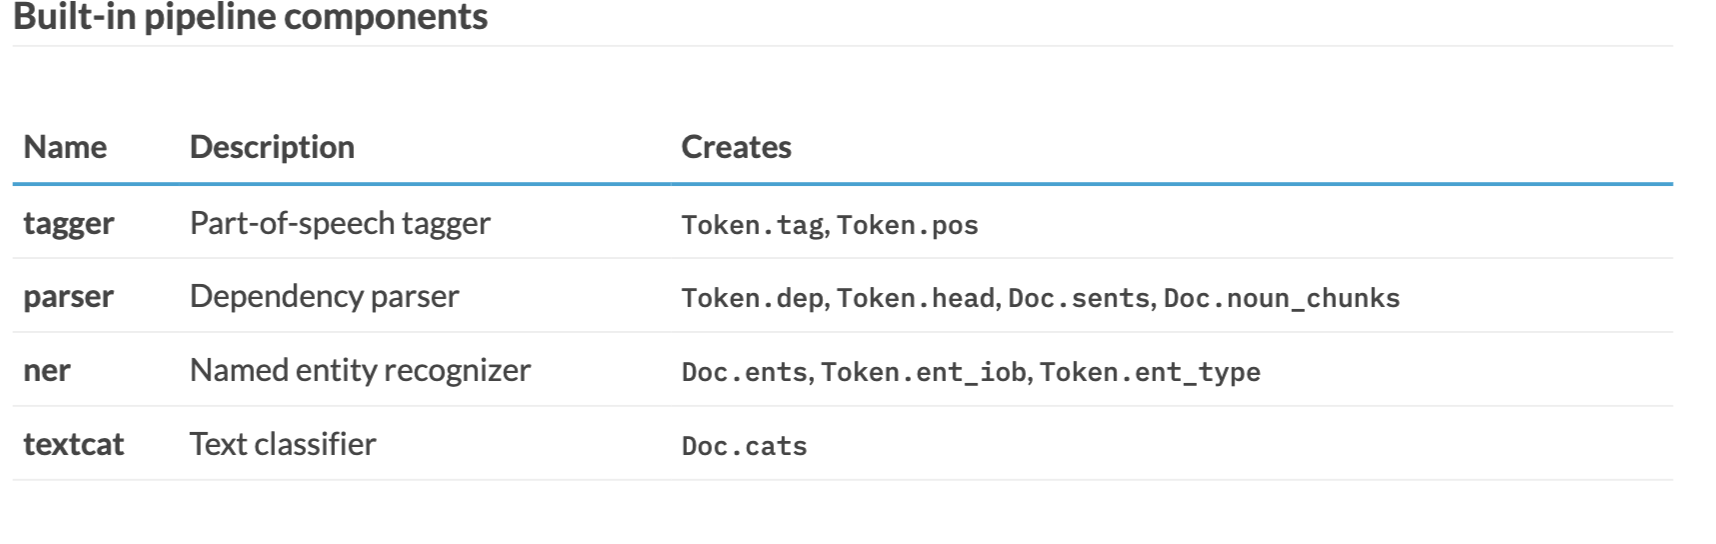

To see the names of the pipeline components present in the current nlp object, you can use the nlp.pipe_names attribute.

For a list of component name and component function tuples, you can use the nlp.pipeline attribute.

The component functions are the functions applied to the doc to process it and set attributes – for example, part-of-speech tags or named entities.

In [81]:
nlp = spacy.load("nl_core_news_lg")
print(nlp.pipe_names)

['tok2vec', 'morphologizer', 'tagger', 'parser', 'lemmatizer', 'attribute_ruler', 'ner']


In [82]:
for component in nlp.pipeline:
    print(component)

('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x1366c6940>)
('morphologizer', <spacy.pipeline.morphologizer.Morphologizer object at 0x136153b20>)
('tagger', <spacy.pipeline.tagger.Tagger object at 0x116c31160>)
('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x136356190>)
('lemmatizer', <spacy.pipeline.edit_tree_lemmatizer.EditTreeLemmatizer object at 0x1366cc820>)
('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x17fb2e4c0>)
('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x136b67e40>)


In [83]:
from spacy.language import Language

# Define a custom component
@Language.component("custom_component")
def custom_component_function(doc):
    # Print the doc's length
    print("Doc length:", len(doc))
    # Return the doc object
    return doc

# Add the component first in the pipeline
nlp.add_pipe("custom_component", first=True)




<function __main__.custom_component_function(doc)>

Custom components are great for adding custom values to documents, tokens and spans, and customizing the doc.ents.

In [84]:
nlp = spacy.load("nl_core_news_lg")
import spacy
from spacy.language import Language
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span


dieren = ["wolf", "geitje", "moeder", "kudde", "schildpad", "eenden", "Kat", "muizen", "haas", "vogels", "kraai", "leeuw", "muis", "vos", "druiven", "Aap", "Kameel", "Trauben", "Stadtmaus", "Landmaus", "Schaf", "Knochen", "Kranich", "Löwe", "Mäuschen"]
animal_patterns = list(nlp.pipe(dieren))
print("animal_patterns:", animal_patterns)
matcher = PhraseMatcher(nlp.vocab)
matcher.add("DIER", animal_patterns)

# Define the custom component
@Language.component("animal_component")
def animal_component_function(fabel4):
    # Apply the matcher to the doc
    matches = matcher(doc)
    # Create a Span for each match and assign the label "DIRE"
    spans = [Span(doc, start, end, label="DIERS") for match_id, start, end in matches]
    # Overwrite the doc.ents with the matched spans
    doc.ents = spans
    return doc


# Add the component to the pipeline after the "ner" component
nlp.add_pipe("animal_component", after="ner")
print(nlp.pipe_names)

# Process the text and print the text and label for the doc.ents
print([(ent.text, ent.label_) for ent in fabel4.ents])

animal_patterns: [wolf, geitje, moeder, kudde, schildpad, eenden, Kat, muizen, haas, vogels, kraai, leeuw, muis, vos, druiven, Aap, Kameel, Trauben, Stadtmaus, Landmaus, Schaf, Knochen, Kranich, Löwe, Mäuschen]
['tok2vec', 'morphologizer', 'tagger', 'parser', 'lemmatizer', 'attribute_ruler', 'ner', 'animal_component']
[('Veldmuis', 'FAC'), ('dat.', 'GPE'), ('Stadsmuis', 'FAC'), ('Veldmuis', 'FAC'), ('volgende morgen', 'DATE'), ('Veldmuis', 'FAC'), ('volgende morgen', 'DATE'), ('Stadsmuis', 'FAC'), ('Veldmuis', 'FAC'), ('Veldmuis', 'FAC'), ('Veldmuis', 'FAC'), ('Kat', 'WORK_OF_ART'), ('Doodsbang', 'ORG'), ('Veldmuis', 'FAC'), ('Stadsmuis', 'FAC'), ('nederig', 'PERSON')]


In [85]:
displacy.render(fabel4, style="ent")


it's tagging the mice as organizations locatins and events, To improve the accuracy of entity recognition for animals, I will consider training a custom entity recognition model on a labeled dataset that includes animal names. This would allow to specifically train the model to recognize animal entities and assign them the correct label.

In [86]:
#To see the available entity labels for the Dutch model in your version of spaCy: (to be checked*****)
nlp = spacy.load("nl_core_news_lg")
print(nlp.pipe_labels["ner"])


['CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART']


In [87]:
for ent in fabel1.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Alstublieft 1004 1015 ORG


In [88]:
print("Noun phrases:", [chunk.text for chunk in fabel1.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

#Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

Noun phrases: ['een klein geitje', 'dat hoorntjes', 'hij', 'Hij', 'de wei', 'zijn moeder', 'een grote kudde', 'geiten', 'hij', 'Elke avond', 'de geiten', 'hun stal', 'een avond', 'het klein geitje', 'de wei', 'Zijn moeder', 'huis', 'hij', 'het malse gras', 'hij', 'een tijdje', 'hij', 'zijn moeder en de andere geiten al', 'huis', 'Hij', 'De zon', 'lange schaduwen', 'de grond', 'Een koude wind', 'akelige geluiden', 'het gras', 'de bomen', 'Het geitje', 'de verschrikkelijke wolf', 'Hij', 'de weide', 'zijn moeder', 'hij', 'hij', 'een groepje', 'bomen', 'de wolf', 'Het geitje', 'het', 'de wolf', 'mijnheer', 'hij', 'Ik', 'u', 'uw blokfluit', 'een liedje', 'ik', 'ik', 'De wolf', 'een leuk idee', 'een liedje', 'hij', 'het geitje', 'Hij', 'zijn blokfluit', 'zijn mond', 'een liedje', 'Het geitje', 'het geluid', 'de blokfluit', 'de honden', 'die', 'de geiten', 'Ze', 'het liedje', 'de wolf', 'de wei', 'De wolf', 'zijn liedje', 'de honden', 'hij', 'hij', 'plaats', 'een liedje', 'hij', 'het geitje',

In [89]:
fabel1 = nlp("Er was eens een klein geitje dat hoorntjes begon te krijgen en daarom dacht dat hij nu al een grote geit was. Hij liep in de wei, samen met zijn moeder en een grote kudde geiten, en zei tegen iedereen dat hij nu wel voor zichzelf kon zorgen. Elke avond gingen de geiten naar hun stal om er te slapen. Op een avond bleef het klein geitje op de wei staan.  Zijn moeder riep hem om mee naar huis te gaan. Maar hij wilde niet luisteren en bleef knabbelen aan het malse gras. Toen hij na een tijdje rondkeek zag hij dat zijn moeder en de andere geiten al naar huis waren. Hij was helemaal alleen. De zon ging onder en er kropen lange schaduwen over de grond. Een koude wind stak op en maakte akelige geluiden in het gras en in de bomen. Het geitje rilde toen het dacht aan de verschrikkelijke wolf. Hij liep snel over de weide en begon te roepen op zijn moeder. Maar hij was nog niet halfweg toen hij, naast een groepje bomen, de wolf zag staan! Het geitje was bang want het wist dat de wolf hem zou opeten. “Alstublieft, mijnheer de wolf” zei hij bevend “Ik weet dat u mij gaat opeten. Maar speel eerst op uw blokfluit een liedje voor mij, want ik wil dansen en vrolijk zijn, zolang als ik kan.” De wolf vond het een leuk idee om eerst een liedje te spelen vooraleer hij het geitje zou opeten.  Hij zette zijn blokfluit aan zijn mond en speelde een liedje. Het geitje begon vrolijk te dansen en rond te springen. Maar het geluid van de blokfluit werd gehoord door de honden die de geiten beschermen. Ze herkenden het liedje van de wolf en begonnen heel hard naar de wei te lopen. De wolf hield ineens op met zijn liedje en liep snel weg.Terwijl de honden achter hem zaten was hij boos op zichzelf omdat hij zo dom was geweest. In plaats van eerst een liedje te spelen had hij beter het geitje onmiddellijk opgegeten. Laat je nooit afleiden als je iets wilt bereiken.")

fabel1.ents = [
    Span(fabel1, 0, 1, label="WEBSITE"),
    Span(fabel1, 3, 4, label="WEBSITE"),
]


<h4> Extension attributes </h4>

In [90]:
# Import global classes
from spacy.tokens import Doc, Token, Span

# Set extensions on the Doc, Token and Span
Doc.set_extension("title", default=None)
Token.set_extension("is_color", default=False)
Span.set_extension("has_color", default=False)

Extension attribute types
Attribute extensions
Property extensions
Method extensions

In [91]:
#processing large volumes of text
# use nlp.make_doc to turn a text into a Doc object
# doc = nlp.make_doc("Hello World!")
docs = list(nlp.pipe(text))

use nlp.select_pipes(disable=["tagger, "parser"])
doc = nlp(text)
print(doc.ents)

In [ ]:
#displacy.render(docs, style="ent")


In [ ]:
#nlp = spacy.load("nl_core_news_lg")
# Process the texts and print the adjectives
#for doc in nlp.pipe(docs):
    #print([token.text for token in doc if token.pos_ == "ADJ"])

In [ ]:
# Process the texts and print the entitities
#docus = list(nlp.pipe(docs))
#entities = [docus.ent for docu in docus]
#print(*entities)

In [92]:
dieren = ["wolf", "geitje", "moeder", "kudde", "schildpad", "eenden", "Kat", "muizen", "haas", "vogels", "kraai", "leeuw", "muis", "vos", "druiven", "Aap", "Kameel", "Trauben", "Stadtmaus", "Landmaus", "Schaf", "Knochen", "Kranich", "Löwe", "Mäuschen"]
# Create a list of patters for the PhraseMatcher
patterns = list(nlp.pipe(dieren))